<a href="https://colab.research.google.com/github/adithya36/Used_Cars_Price_Prediction/blob/Data_cleaning/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import
*   libraries
*   drive
*   df

In [ ]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns

!pip install fuzzywuzzy[speedup]
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149865 sha256=d7e3e7156c93d9c23a830d139e08a8f25be72df28e8b59774fe635fc582e308e
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-levenshtein


In [ ]:
import matplotlib.pyplot as plt
!pip install plotly
!pip install cufflinks
import plotly.express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`



In [ ]:
!pip install geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

     |████████████████████████████████| 994 kB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 45.6 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("filepath_or_buffer", index_col=None)
#df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/vehicles.csv", index_col=0)
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/cars.csv")

df1: **cars.csv**
*   describe
*   clean





In [ ]:
df = df2

In [ ]:
#get number of rows & cols
df.shape

(38531, 30)

In [ ]:
#get number of elements
df.size

1155930

In [ ]:
#get head
df.head(n=5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [ ]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [ ]:
#get descriptive stats
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [ ]:
#get sum nan
df.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [ ]:
#get sum non nan
df.notnull().sum()

manufacturer_name    38531
model_name           38531
transmission         38531
color                38531
odometer_value       38531
year_produced        38531
engine_fuel          38531
engine_has_gas       38531
engine_type          38531
engine_capacity      38521
body_type            38531
has_warranty         38531
state                38531
drivetrain           38531
price_usd            38531
is_exchangeable      38531
location_region      38531
number_of_photos     38531
up_counter           38531
feature_0            38531
feature_1            38531
feature_2            38531
feature_3            38531
feature_4            38531
feature_5            38531
feature_6            38531
feature_7            38531
feature_8            38531
feature_9            38531
duration_listed      38531
dtype: int64

In [ ]:
#remove duplicate rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(38491, 30)

In [ ]:
#change col names
df = df.rename(columns={'year_produced': 'year', 'price_usd': 'price','manufacturer_name	': 'manufacturer','engine_fuel' : 'fuel','transmission':'gear','odometer_value':'odometer'})
df.head()

,manufacturer_name,model_name,gear,color,odometer,year,fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [ ]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

50000.0
1.0
6632.809226832238
4800.0


In [ ]:
df = df[df['price'] >=50] 
df.pivot_table(values='price', index='manufacturer_name',aggfunc=[np.mean, np.median, np.max, np.min])

,mean,median,amax,amin
,price,price,price,price
manufacturer_name,,,,
Acura,12772.885909,12024.500,36500.00,2350.00
Alfa Romeo,2688.550097,2000.000,22000.00,104.33
Audi,7154.944923,5330.790,46750.00,130.00
BMW,9553.258777,6750.000,50000.00,200.00
Buick,12876.319149,12300.000,24000.00,5300.00
Cadillac,11093.124651,9100.000,25750.00,1700.00
Chery,4545.978103,3750.000,16077.02,1250.00
Chevrolet,8873.131995,8300.000,49900.00,800.00


manufacturer_name
Acura            12772.885909
Alfa Romeo        2688.550097
Audi              7154.944923
BMW               9553.258777
Buick            12876.319149
Cadillac         11093.124651
Chery             4545.978103
Chevrolet         8873.131995
Chrysler          4995.491780
Citroen           4435.325516
Dacia             5342.751525
Daewoo            1576.608733
Dodge             5608.011953
Fiat              3013.676440
Ford              4997.677323
Geely             7769.232535
Great Wall        6423.760278
Honda             6515.096474
Hyundai           7926.190394
Infiniti         13794.604938
Iveco            10052.317122
Jaguar           17813.000000
Jeep             10912.489439
Kia               8156.095526
LADA              7598.681370
Lancia            2901.508370
Land Rover       15195.300380
Lexus            17130.560845
Lifan             8280.536170
Lincoln           9737.472222
Mazda             4735.091929
Mercedes-Benz     9394.015818
Mini             13133

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



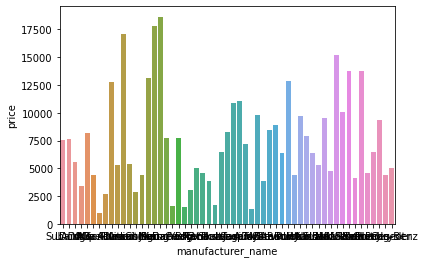

In [ ]:
#distribution bar chart --> manufacturer/ASP
print(df.groupby('manufacturer_name', as_index=True)['price'].mean())
plt2 = sns.barplot('manufacturer_name', 'price', data=df, ci=False)

manufacturer_name
Acura            12772.885909
Alfa Romeo        2688.550097
Audi              7154.944923
BMW               9553.258777
Buick            12876.319149
Cadillac         11093.124651
Chery             4545.978103
Chevrolet         8873.131995
Chrysler          4995.491780
Citroen           4435.325516
Dacia             5342.751525
Daewoo            1576.608733
Dodge             5608.011953
Fiat              3013.676440
Ford              4997.677323
Geely             7769.232535
Great Wall        6423.760278
Honda             6515.096474
Hyundai           7926.190394
Infiniti         13794.604938
Iveco            10052.317122
Jaguar           17813.000000
Jeep             10912.489439
Kia               8156.095526
LADA              7598.681370
Lancia            2901.508370
Land Rover       15195.300380
Lexus            17130.560845
Lifan             8280.536170
Lincoln           9737.472222
Mazda             4735.091929
Mercedes-Benz     9394.015818
Mini             13133

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



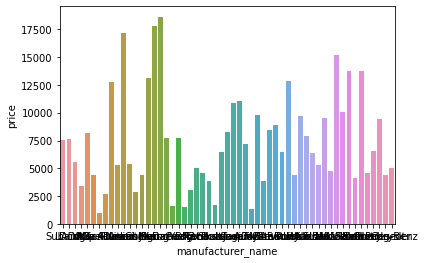

In [ ]:
#distribution bar chart --> manufacturer/ASP
print(df.groupby('manufacturer_name', as_index=True)['price'].mean()) 
plt2 = sns.barplot('manufacturer_name', 'price', data=df, ci=False)

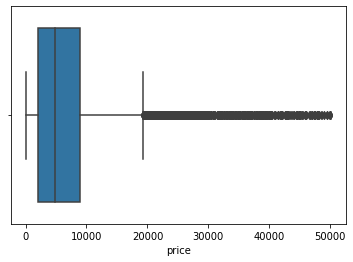

In [ ]:
#detect and remove outliers
sns.boxplot(x=df['price'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

odometer            167000.0
year                    11.0
engine_has_gas           0.0
engine_capacity          0.7
has_warranty             0.0
price                 6850.0
is_exchangeable          1.0
number_of_photos         7.0
up_counter              14.0
feature_0                0.0
feature_1                1.0
feature_2                0.0
feature_3                1.0
feature_4                0.0
feature_5                1.0
feature_6                0.0
feature_7                1.0
feature_8                1.0
feature_9                1.0
duration_listed         68.0
dtype: float64


In [ ]:
print(df < (Q1 - 1.5 * IQR))

       body_type  color  drivetrain  ...  state  up_counter   year
0          False  False       False  ...  False       False  False
1          False  False       False  ...  False       False  False
2          False  False       False  ...  False       False  False
3          False  False       False  ...  False       False  False
4          False  False       False  ...  False       False  False
...          ...    ...         ...  ...    ...         ...    ...
38526      False  False       False  ...  False       False  False
38527      False  False       False  ...  False       False  False
38528      False  False       False  ...  False       False  False
38529      False  False       False  ...  False       False  False
38530      False  False       False  ...  False       False  False

[38483 rows x 30 columns]


In [ ]:
print(df > (Q3 + 1.5 * IQR))

       body_type  color  drivetrain  ...  state  up_counter   year
0          False  False       False  ...  False       False  False
1          False  False       False  ...  False        True  False
2          False  False       False  ...  False        True  False
3          False  False       False  ...  False        True  False
4          False  False       False  ...  False       False  False
...          ...    ...         ...  ...    ...         ...    ...
38526      False  False       False  ...  False        True  False
38527      False  False       False  ...  False       False  False
38528      False  False       False  ...  False        True  False
38529      False  False       False  ...  False        True  False
38530      False  False       False  ...  False        True  False

[38483 rows x 30 columns]


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_out.shape

(12552, 30)

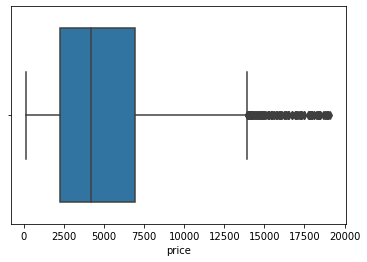

In [ ]:
sns.boxplot(x=df_out['price'])

   manufacturer_name         price
0              Acura   6000.000000
1         Alfa Romeo   1898.982500
2               Audi   4354.041593
3                BMW   3940.508716
4              Buick  12050.000000
5              Chery   3448.400645
6          Chevrolet   7337.539796
7           Chrysler   3877.473131
8            Citroen   4340.432221
9              Dacia   5758.684211
10            Daewoo   1710.896765
11             Dodge   4275.232364
12              Fiat   3051.133077
13              Ford   4533.169575
14             Geely   6023.357778
15        Great Wall   5953.846154
16             Honda   5481.502733
17           Hyundai   6830.764849
18             Iveco  11735.200000
19              Jeep  11639.868571
20               Kia   7627.376886
21              LADA   7996.593284
22            Lancia   2559.265641
23        Land Rover   6663.072308
24             Lexus   7000.000000
25             Lifan   4763.088889
26             Mazda   3873.434963
27     Mercedes-Benz

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



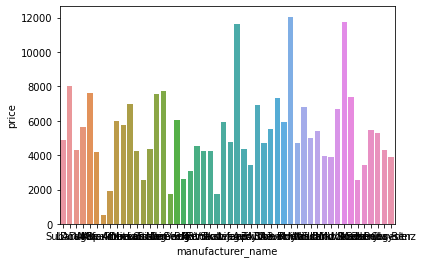

In [ ]:
print(df_out.groupby('manufacturer_name', as_index=False)['price'].mean())
plt2 = sns.barplot('manufacturer_name', 'price', data=df_out, ci=False)

In [ ]:
print(df_out['price'].max())
print(df_out['price'].min())
print(df_out['price'].mean())
print(df_out['price'].median())

19112.21
142.27
4958.209291746339
4200.0


In [ ]:
#get final info
df = df_out
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12552 entries, 10 to 38519
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  12552 non-null  object 
 1   model_name         12552 non-null  object 
 2   gear               12552 non-null  object 
 3   color              12552 non-null  object 
 4   odometer           12552 non-null  int64  
 5   year               12552 non-null  int64  
 6   fuel               12552 non-null  object 
 7   engine_has_gas     12552 non-null  bool   
 8   engine_type        12552 non-null  object 
 9   engine_capacity    12548 non-null  float64
 10  body_type          12552 non-null  object 
 11  has_warranty       12552 non-null  bool   
 12  state              12552 non-null  object 
 13  drivetrain         12552 non-null  object 
 14  price              12552 non-null  float64
 15  is_exchangeable    12552 non-null  bool   
 16  location_region    12

In [ ]:
#drop columns
#keep: fuel, gear, year, odometer, price, manufacturer
df = df.drop(['model_name', 'color','engine_has_gas','engine_type','engine_capacity','body_type','has_warranty','state','drivetrain','is_exchangeable','location_region','number_of_photos','up_counter','duration_listed','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
df.head()

,manufacturer_name,gear,odometer,year,fuel,price
10,Subaru,mechanical,280000,2003,gasoline,6900.0
12,Subaru,mechanical,321000,2002,gasoline,4300.0
17,Subaru,mechanical,191000,2005,gasoline,10950.0
26,Subaru,automatic,417000,1997,gasoline,1850.0
32,Subaru,mechanical,340000,1993,gasoline,2000.0


In [ ]:
df['country'] = 'Belarus'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12552 entries, 10 to 38519
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  12552 non-null  object 
 1   gear               12552 non-null  object 
 2   odometer           12552 non-null  int64  
 3   year               12552 non-null  int64  
 4   fuel               12552 non-null  object 
 5   price              12552 non-null  float64
 6   country            12552 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df['gear'] = df['gear'].replace('mechanical','manual')
df['gear'].unique()

array(['manual', 'automatic'], dtype=object)

In [ ]:
df['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid-petrol', 'electric'], dtype=object)

In [ ]:
df['manufacturer_name'] = df['manufacturer_name'].str.lower()
df['manufacturer_name'].unique()

array(['subaru', 'lada', 'dodge', 'уаз', 'kia', 'opel', 'москвич',
       'alfa romeo', 'acura', 'dacia', 'lexus', 'mitsubishi', 'lancia',
       'citroen', 'mini', 'ssangyong', 'daewoo', 'geely', 'ваз', 'fiat',
       'ford', 'renault', 'seat', 'rover', 'volkswagen', 'lifan', 'jeep',
       'audi', 'заз', 'toyota', 'газ', 'volvo', 'chevrolet', 'great wall',
       'buick', 'pontiac', 'hyundai', 'nissan', 'suzuki', 'bmw', 'mazda',
       'land rover', 'iveco', 'skoda', 'saab', 'chery', 'honda',
       'mercedes-benz', 'peugeot', 'chrysler'], dtype=object)

In [ ]:
df = df.dropna()
df.shape

(12552, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12552 entries, 10 to 38519
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  12552 non-null  object 
 1   gear               12552 non-null  object 
 2   odometer           12552 non-null  int64  
 3   year               12552 non-null  int64  
 4   fuel               12552 non-null  object 
 5   price              12552 non-null  float64
 6   country            12552 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 784.5+ KB


In [ ]:
df = df[df['price'] >=1000] #-->e.g.
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

19112.21
1000.0
5211.000436286923
4481.64


In [ ]:
df.shape

(11850, 7)

In [ ]:
print(df['odometer'].max())
print(df['odometer'].min())
print(df['odometer'].mean())
print(df['odometer'].median())

573000
1000
246244.59562702058
250000.0


In [ ]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/cars_clean.csv', index = False)